In [10]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv("./opf_dataset.csv")
df.head()

,Pd_bus1,Pd_bus2,Pd_bus3,Pd_bus4,Pd_bus5,Pd_bus6,Pd_bus7,Pd_bus8,Pd_bus9,Pd_bus10,...,branch12,branch13,branch14,branch15,branch16,branch17,branch18,branch19,branch20,Total_Cost
0,0,19.076429,85.929486,42.930638,6.882287,9.976807,0,0,25.071307,7.864655,...,6.794835,15.123445,0,24.842640,5.549017,8.476750,-2.315638,1.160419,3.873125,1830.462402
1,0,22.408889,90.262477,47.653607,7.840857,10.567620,0,0,30.461183,9.335238,...,7.655727,17.536905,0,29.592650,6.157701,9.953704,-3.177537,1.631585,5.312803,2038.038512
2,0,21.250600,84.789378,45.698032,6.987438,10.174701,0,0,27.446395,8.719879,...,7.144514,16.306829,0,27.231446,5.836924,9.573233,-2.882955,1.484154,4.961286,1910.939490
3,0,20.231362,90.274636,44.517001,6.787010,9.768324,0,0,28.237455,8.303629,...,7.194058,16.277204,0,27.071396,5.475701,8.891510,-2.827927,1.401437,4.590052,1931.562910
4,0,17.824311,78.109820,40.341014,6.601143,9.851655,0,0,24.288513,7.694658,...,6.082688,13.862389,0,23.842736,5.254357,7.980567,-2.440301,1.249956,4.087354,1706.604875


In [17]:
X = df[[f"Pd_bus{i}" for i in range(1, 15)]].values      # inputs
y = df[[f"Pg_gen{i}" for i in range(1, 6)]].values  

print(X)

[[ 0.         19.07642917 85.92948561 ...  5.63441643 12.41073843
  12.3498755 ]
 [ 0.         22.40888894 90.26247728 ...  6.02414213 13.85568621
  15.26650724]
 [ 0.         21.25060029 84.78937778 ...  5.66035972 12.82969689
  14.53451946]
 ...
 [ 0.         17.71160606 77.967851   ...  5.10965403 11.84414725
  12.31727824]
 [ 0.         20.75240718 88.95140637 ...  5.9625909  13.71772311
  14.6812682 ]
 [ 0.         19.87944548 85.34301052 ...  5.15038316 12.25121374
  12.87820495]]


In [18]:
 print(y)

[[231.0912417   0.          0.          0.          0.       ]
 [257.2971998   0.          0.          0.          0.       ]
 [241.2512702   0.          0.          0.          0.       ]
 ...
 [215.5463006   0.          0.          0.          0.       ]
 [250.8901288   0.          0.          0.          0.       ]
 [234.9737575   0.          0.          0.          0.       ]]


In [20]:
# train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [26]:
# MLP model training
model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', max_iter=10000, random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=10000, random_state=42)

In [27]:
# prediction and evalutation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Test MSE: 0.19088715135970588


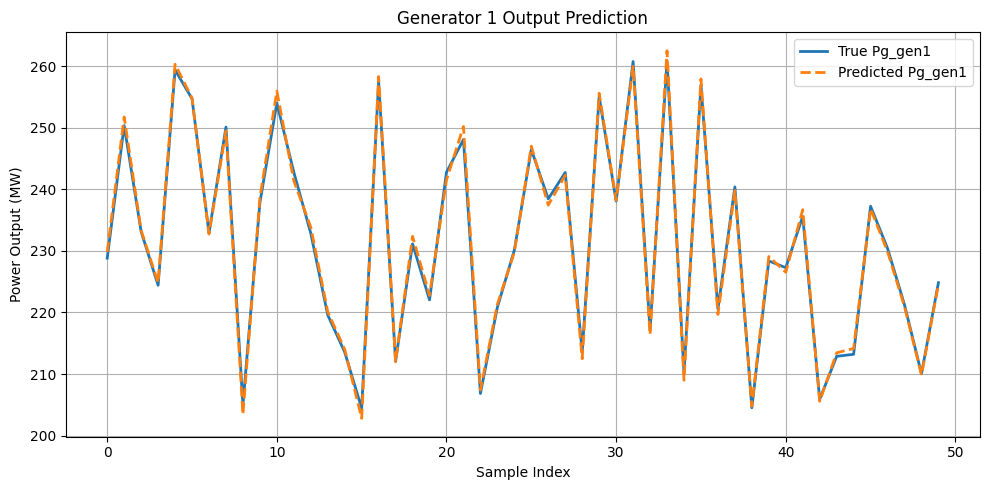

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[:, 0], label="True Pg_gen1", linewidth=2)
plt.plot(y_pred[:, 0], label="Predicted Pg_gen1", linestyle='--', linewidth=2)
plt.title("Generator 1 Output Prediction")
plt.xlabel("Sample Index")
plt.ylabel("Power Output (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
